In [4]:
import numpy as np
import matplotlib.pyplot as pl
from mpl_toolkits import mplot3d

# Task A

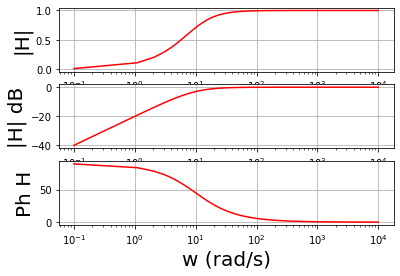

In [2]:
# a
# set the omega range
w = np.arange(0.1,10000,1)
# evaluate the function H(w)
H = 1j*w*0.1 / (1+1j*w*0.1)
# determine amplitued (also in dB) and phase of H(w)
Hamp = abs(H) # amplitude of H
HampdB = 20*np.log10(Hamp) # amplitude of H in dB
Hphase = np.arctan2(H.imag,H.real)*180/np.pi # phase of H, in degree
# plotting section
pl.subplot(3, 1, 1)
pl.semilogx(w,Hamp,'r')
pl.xlabel('w (rad/s)',fontsize=20)
pl.ylabel('|H|',fontsize=20)
pl.grid()
pl.subplot(3, 1, 2)
pl.semilogx(w,HampdB,'r')
pl.xlabel('w (rad/s)',fontsize=20)
pl.ylabel('|H| dB',fontsize=20)
pl.grid()
pl.subplot(3, 1, 3)
pl.semilogx(w,Hphase,'r')
pl.xlabel('w (rad/s)',fontsize=20)
pl.ylabel('Ph H',fontsize=20)
pl.grid()
pl.show()

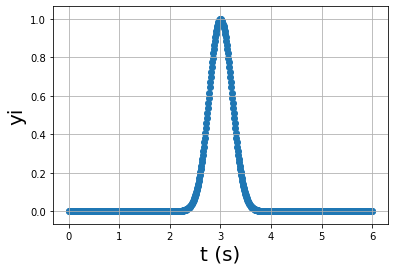

In [3]:
# b
# set the t range
dt = 0.01
t = np.arange(0,6+dt,dt)
# discretised value of yi
yi = np.exp(-(t-3)**2/0.1)
pl.scatter(t,yi)
pl.xlabel('t (s)',fontsize=20)
pl.ylabel('yi',fontsize=20)
pl.grid()
pl.show()

In [9]:
# Discrete Fourier Transform
def DFT(yn):
    # y: values of the function, in time domain
    N = len(yn)
    w = 2*np.pi/N
    FTk = np.zeros(N)
    for k in range(0,N):
        for n in range(0,N):
            FTk[k] += np.exp(-1j*k*w*n)*yn[n]
    return FTk

In [46]:
# Inverse Discrete Fourier Transform
def DFTInv(FTk):
    # ft: values of the FT, in frequency domain
    N = len(FTk)
    w = 2*np.pi/N
    yn = np.zeros(N)
    for n in range(0,N):
        for k in range(0,N):
            yn[n] += np.exp(1j*k*w*n)*FTk[k]
    yn = yn / N
    return yn

/Users/ncinosi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


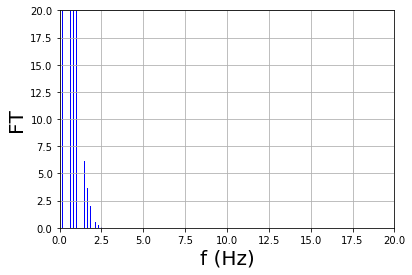

In [96]:
# c
Yif = DFT(yi)

N = len(t)  # number of discrete points available
# build the frequency domain axis
df = 1/(N*dt) # frequency step
f = np.arange(0,1/dt,df)
pl.bar(f[:int(N/2)],abs(Yif[:int(N/2)]),width=0.04,color='b')
pl.axis([0,20,0,20])
pl.grid()
pl.xlabel('f (Hz)',fontsize=20)
pl.ylabel('FT',fontsize=20)
pl.show()

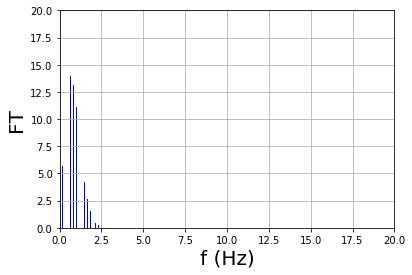

In [97]:
# d
# determine the range of omega for the given range of f
w = 2*np.pi*f
# evaluate H(w) at these w
H = 1j*w*0.1 / (1+1j*w*0.1)
# pass the input signal through the filter
Yof = H * Yif
pl.bar(f[:int(N/2)],abs(Yof[:int(N/2)]),width=0.04,color='b')
pl.axis([0,20,0,20])
pl.grid()
pl.xlabel('f (Hz)',fontsize=20)
pl.ylabel('FT',fontsize=20)
pl.show()

/Users/ncinosi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


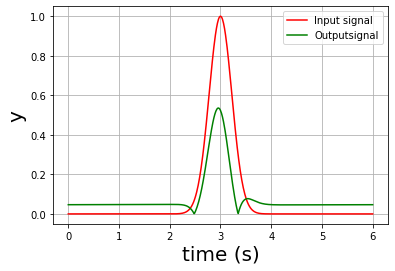

In [99]:
# e
yo = DFTInv(Yof)
# plot the filtered function in time
pl.plot(t,abs(yi),color='r')
pl.plot(t,abs(yo),color='g')
pl.grid()
pl.xlabel('time (s)',fontsize=20)
pl.ylabel('y',fontsize=20)
pl.legend(['Input signal','Output signal'])
pl.show()

# Task B

In [8]:
def func(yn,ynp,ynp2,tn,h):
    g = 9.8
    L = 2
    m = 10
    c = 0.001
    f = (yn-2*ynp+ynp2)/h**2+c/m*(yn-ynp)/h+g/L*np.sin(yn)
    #f = yn*(1+h**2*c/m) + h**2*g/L*np.sin(yn) - 2*ynp + ynp2 
    return f

In [6]:
def mybisection(a,b,ynp,ynp2,tn,h,eps):
    # repeat the split of teh interval until the bracketing intervla becomes smaller than the accuracy
    while abs(a-b)>eps:
        # calculate the mid point
        xm = (a + b) / 2
        # establish in which subinterval the solution lies
        # compute f(a) * f(xm)
        ff = func(a,ynp,ynp2,tn,h) * func(xm,ynp,ynp2,tn,h)
        if ff < 0: 
            # the solution lies in the left interval
            # set the upper bracket as xm
            b = xm
        else:
            # the solution lies in the right interval
            # set the lower bracket as xm
            a = xm
            
    # the true solution is bracketed within the latest interval [a,b]
    # we can approximate it with the midpoint
    sol = (a + b) / 2
    
    return sol

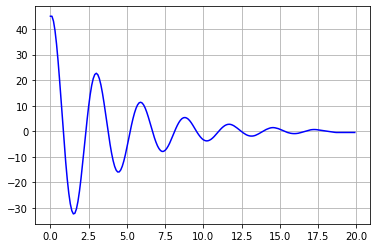

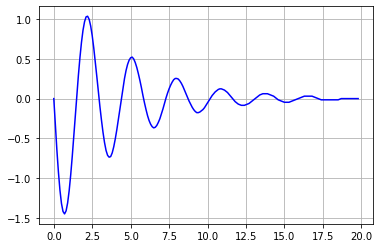

In [9]:
#
dt = 0.1
tend = 20
y0 = 45.0;
vinit = 0
t = np.arange(0,tend,dt)
y = np.ndarray(len(t))
y[0] = y0*np.pi/180 # initial condition on position
y[1] = vinit*dt+y[0] # intial condition on velocity
ynp = y[1]
ynp2 = y[0]
# iterate from the third time step
for i in range(2,len(t)):
    # determine the solution at this time step
    y[i] = mybisection(-np.pi/2,np.pi/2,ynp,ynp2,t[i],dt,0.001) # the angle of solution will not exceed -pi/2 +pi/2
    ynp = y[i] # make the current solution as the solution at previous time step
    ynp2 = y[i-1] # update the solution at two timesteps ago
    
pl.plot(t,y*180/np.pi,'b')
pl.grid()
pl.show()

# determine the velocity
v = np.ndarray(len(t)-1)
v = (y[1:] - y[:-1])/dt
pl.plot(t[:-1],v,'b')
pl.grid()
pl.show()

# Task C

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6. ]


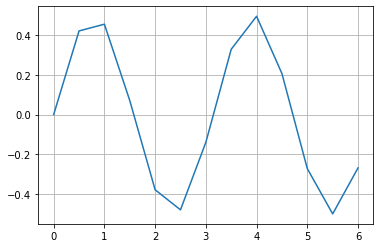

In [40]:
# interim
xn = np.linspace(0,6,13)
print(xn)
yn = np.sin(xn)*np.cos(xn)
pl.plot(xn,yn)
pl.grid()

# save into files
f = open('Xn.txt','w')
for v in xn:
    f.write(str(v)+'\n')
f.close()
f = open('Yn.txt','w')
for v in yn:
    f.write(str(v)+'\n')
f.close()

In [15]:
# Langrangian polynomial
# compute the Lagrangian polynomials j, given nodes xn at a given point xp
def Lagrangian(j,xn,xp):
    # establish the number of nodes
    n = len(xn)
    # the order of the polynomial will then be n-1
    
    # set the initial value of the polynomial to 1
    L = 1
    # range of k is from 0 to n-1 (the order of the polynomial)
    for k in range(0,n):
        # exclude the case k == j
        if k != j:
            L *= (xp-xn[k]) / (xn[j]-xn[k])
    return L

In [16]:
def LagInterp(xn,yn,x):
    N = len(xn)
    # establish the order of the interpolating polynomial, N-1
    n = N - 1
    y = np.ndarray(len(x))
    # interpolate for all the values of x in the interpolating range
    for i in range(len(x)):
        # evaluate pn(xp)
        yp = 0
        # use Langrangian polynomial up to n, included
        for j in range(0,n+1):
            yp += yn[j] * Lagrangian(j,xn,x[i])
        # add the curren value of yp to the list of y
        y[i] = yp
    return y

In [41]:
# read data
f = open('Xn.txt','r')
xnt = f.readlines()
f.close
f = open('Yn.txt','r')
ynt = f.readlines()
f.close
xn = []
for v in xnt:
    xn += [float(v)]
xn = np.array(xn)
yn = []
for v in ynt:
    yn += [float(v)]
yn = np.array(yn)
print(xn)
print(yn)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6. ]
[ 0.          0.42073549  0.45464871  0.07056    -0.37840125 -0.47946214
 -0.13970775  0.3284933   0.49467912  0.20605924 -0.27201056 -0.4999951
 -0.26828646]


In [42]:
# form the points where to interpolate
xi = np.ndarray(12)
for i in range(12):
    xi[i] = (xn[i+1] + xn[i])/2
print(xi)

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75 5.25 5.75]


In [43]:
# interpolate by using the nodes at even positions only
xne = xn[0::2]
yne = yn[0::2]
print(xne)
yeven = LagInterp(xne,yne,xi)

[0. 1. 2. 3. 4. 5. 6.]


In [44]:
# interpolate by using the nodes at odd positions only
xno = xn[1::2]
yno = yn[1::2]
print(xno)
yodd = LagInterp(xno,yno,xi)

[0.5 1.5 2.5 3.5 4.5 5.5]


In [45]:
# interpolate by using all the nodes
yall = LagInterp(xn,yn,xi)

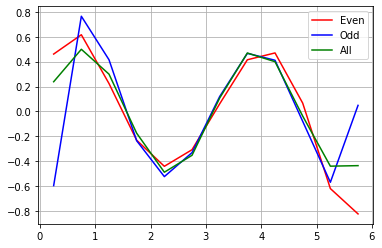

In [46]:
# plot all the interpolations together
pl.plot(xi,yeven,'r')
pl.plot(xi,yodd,'b')
pl.plot(xi,yall,'g')
pl.legend(['Even','Odd','All'])
pl.grid()
pl.show()

# Task D

In [47]:
# function trapz: compute numerical integration with trapezium rule, for nodes at any distance
def trapz(x,y):
    # get the number of subintervals
    N = len(x) - 1
    # compute the integral
    # set range for the trapezia: there are as many trapezia as the number of intervals
    R = range(0,N)
    S = 0
    for i in R:
        # compute the area of this single trapezium (remind yourself the area of a trapezium)
        S += 0.5 * (y[i+1] + y[i]) * (x[i+1] - x[i])
    return S

In [48]:
# b

# set the step intervals in x and y
dx = 0.01
dy = 0.01

# set the x range, not including the boundaries
x = np.arange(-3+dx,3,dx)
N = len(x)
# the y range depends of the various values of x, and cannot be fixed here

# integrate in dy, for all the value of x, i.e. find G(x)
G = np.zeros(N)
# for every x
for i in range(0,N):
    # determine the boundaries m and p for this x
    mx = np.sqrt(4*(1-x[i]**2/9))
    px = mx
    # set the y points for this x, not including the boundaries
    y = np.arange(-mx+dy,px,dy)
    z = np.zeros(len(y))
    # determine the values of the function z(x,y)
    for j in range(0,len(y)):
        z[j] = x[i]**2+y[j]**2 # integrand
    
    # integrate in dy from cx to dx (for this specific x)
    G[i] = trapz(y,z) # G(x)

# integrate G(x) in dx
I = trapz(x,G)
print(I)

60.69913321168436


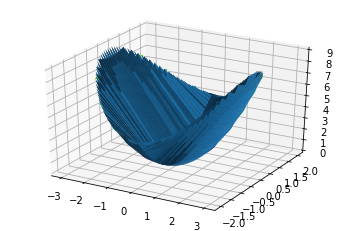

In [50]:
# c
# plotting section
x = np.arange(-3,3+dx,dx)
y = np.arange(-2,2+dy,dy)
[X, Y] = np.meshgrid(x,y)
X[X**2/9+Y**2/4>1] = 0
Y[X**2/9+Y**2/4>1] = 0

F = X**2+Y**2

ax = pl.axes(projection='3d')
ax.plot_surface(X,Y,F)